In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu(first_level=1, last_level=4, header="<font color='blus'>Introduction to Support Vector Machines (SVM) for Classification and Related Concepts in Machine Learning</font>")

# <font color='blus'>What you will learn

> At the end of this course, you will know :
> - How to split a dataset to evaluate a model
> - How to assess the ability of a model for generalization 
> - How to select a metric for classification task considering dataset profile
> - How to select the best classifier

# <font color='blus'>Reminder

> - **Scoring** a model consists in measurement of the performance of this model. 
>> - For a regression task, performance can be measured with $R²$, the coefficient of determination. They are other kind of measurements, depending on business issues. 
>> - For classification task, one possible measure of performance is the accuracy, means, the percentage of correct classification. In this session, we will see other kinds of measurements.
>
> - **Generalization** is the ability for a model to produce a score as close as the score obtained on trained dataset.

# <font color='blus'> Vocabulary

> - Accuracy: the part of correctly classified observations
>
> - Scoring: quantitative value that evaluates a model performance.
>> Scoring depends on task. For a classification task, scoring a model may be the calculation of accuracy. For a regression task, scoring may be the calculation of $R²$, that measures the quality of a regression.
>


# <font color='blus'> Cross-validation

## <font color='blus'> Cross-validation description

> Cross validation is used to assess the ability of generalization.
>
> Until know, to assess a model, a dataset is splited into 2 partitions, train and test parts.
>
> Into this train/test split schema: 
> - Train partition is used to build the model (train the model) 
>
> - Then once trained, the model is assessed with ever seen data from the test partition. Scoring the model consists to evaluate how the trained model has the ability to generalize. 

> 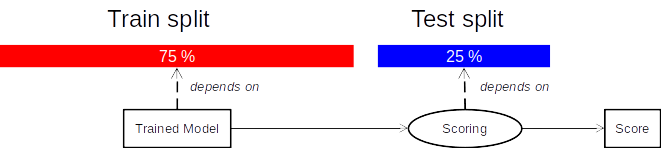

> On this schema, trained model depends on train dataset while score depends on test dataset.

> Cross-validation uses a more comprehensive schema.
>
> The whole dataset is splited into many kfolds, say 5.

> 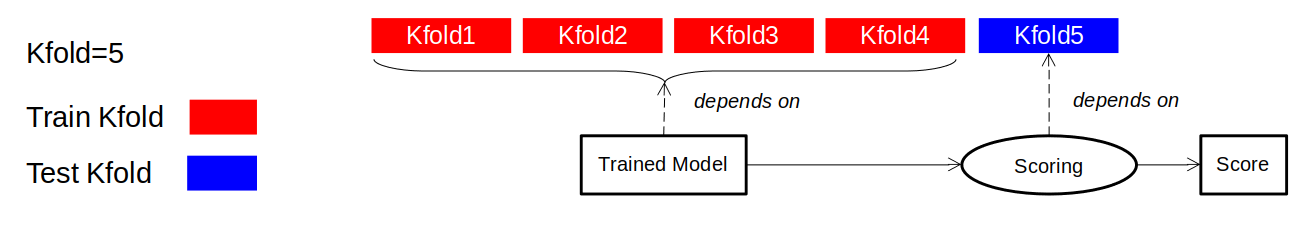 

> On the figure above, Kfolds 1 to 4 are used to train the model, then once done, `Scoring` function takes place on `Trained model` then `Score` is produced.
>
> Scoring uses `Kfold5` then, `Score` that assesses generalization depends on Kfold5.

> 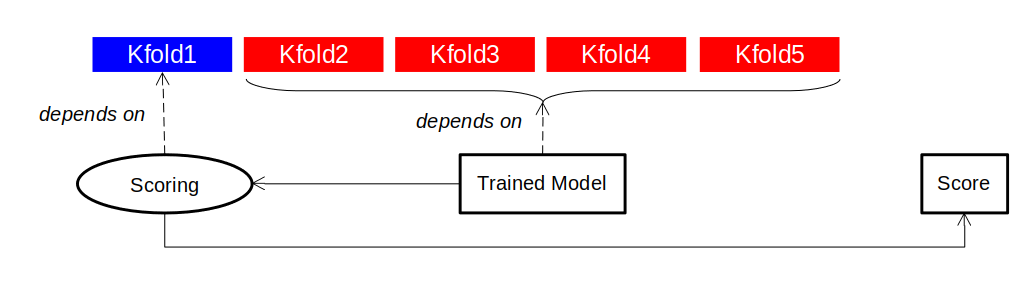

> A next step in cross validation consists in using Kfold 2 to 5 to train the model then, 
>
> once model is trained, then Scoring to takes place with Kfold1. 
>
> The score, produces from Scoring, now depends on Kfold 1

> 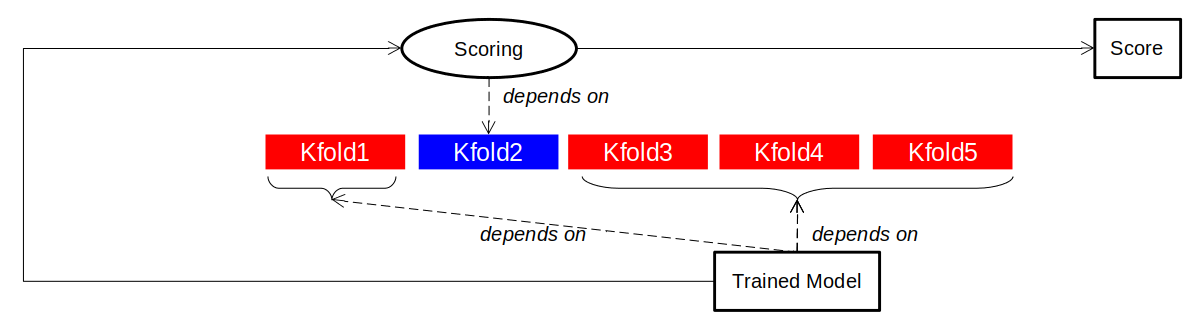

> On this next step, Kfolds 1, 3,4 and 5 are now used to train the model.
>
> Kfold2 is used in the Scoring process.
>
> Note that, on any step of the cross-validation process, a new model is trained then assesed. 
>
> Once scores 1 to 5 are produced, then the **average of all these intermediates scores** produces a value that assesses the ability for the model to generalize.
>
> The **Cross validation schema is not used to select a model. Cross validation schema is used to assess the ability for a model to generalize.** 

## <font color='blus'> Cross-validation implementation

> Here-under cancer dataset is used and for a binary classification task.

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, datasets
from sklearn.linear_model import LogisticRegression
bunch_cancer = datasets.load_breast_cancer()

In [3]:
#import colored
logisticRegression = LogisticRegression(max_iter=5000)
arr_score = cross_val_score(logisticRegression, bunch_cancer.data, bunch_cancer.target)
print("Cross-validation scores/Kfold= {}".format(arr_score))
print("Average cross-validation score= {}".format(arr_score.mean()))

Cross-validation scores/Kfold= [0.93859649 0.94736842 0.98245614 0.92982456 0.96460177]
Average cross-validation score= 0.9525694767893184


> By default, the K-folding strategy consists in 5 kfolds. 
>
> The first line from the print statement displays the score for each one of the kfolds.
>
> Also by default, for binay or multiclass classification, a stratified cross-validation strategy is performed.
>
> The "K-folding" strategy is implemented in classes such as `StratifiedKFold` and `Kflod`, all of them belonging to the `sklearn.model_selection` package. 
>
> The parameter `cv` allows to select one of these  "K-folding" strategies.
>
> On the example below, k-folding is applied for 3 kfolds.

In [4]:
logisticRegression = LogisticRegression(max_iter=5000)
arr_score = cross_val_score(logisticRegression, bunch_cancer.data, bunch_cancer.target, cv=3)
print("Cross-validation scores/Kfold= {}".format(arr_score))
print("Average cross-validation score= {}".format(arr_score.mean()))

Cross-validation scores/Kfold= [0.94210526 0.96315789 0.94179894]
Average cross-validation score= 0.949020699897893


> Below, K-folding strategy is fixed with Kfold stratification and 7 Kfolds 

In [5]:
from sklearn.model_selection import StratifiedKFold

logisticRegression = LogisticRegression(max_iter=5000)
arr_score = cross_val_score(logisticRegression, bunch_cancer.data, bunch_cancer.target, cv=StratifiedKFold(n_splits=7))
print("Cross-validation scores/Kfold= {}".format(arr_score))
print("Average cross-validation score= {}".format(arr_score.mean()))

Cross-validation scores/Kfold= [0.98780488 0.90243902 0.95061728 0.98765432 0.95061728 0.9382716
 0.97530864]
Average cross-validation score= 0.9561018626059276


> Scoring variation range from 0.90 to 0.99. Average provides a smooth result that represents better the ability of the Logistic Regression algorithm for generalization.
>
> Considering train test split, a lucky split may provide a score of 0.99 while being unlucky, train test split may provide a score of 0.91.
>
> Cross-validation avoid this kind of uncertainity.

## <font color='blus'> Some limitations of Cross-validation strategy

In [6]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn import linear_model, datasets
from sklearn.linear_model import LogisticRegression
bunch_iris = datasets.load_iris()

In [7]:
logisticRegression = LogisticRegression(max_iter=5000)
arr_score = cross_val_score(logisticRegression, bunch_iris.data, bunch_iris.target, cv=KFold(n_splits=3))
print("Cross-validation scores/Kfold= {}".format(arr_score))
print("Average cross-validation score= {}".format(arr_score.mean()))

Cross-validation scores/Kfold= [0. 0. 0.]
Average cross-validation score= 0.0


> What's happen?
> 
> K-folding strategy consisting in using KFold class, leads to split dataset into a partition of 3 parts of 50 elements each, without any shuffling. 
>
> Each one of these parts match with a specific class of the dataset.
>
> As displayed below: 
> - the first 50 elements belongs to the class 0 
> - while in the second part ranging from 50 to 99 all elements belong to the class 1 
> - and in the third part ranging from 100 to 149 all elements belong the class 2. 

In [8]:
print(bunch_iris.target[:50])
print()
print(bunch_iris.target[50:99])
print()
print(bunch_iris.target[100:149])
print()


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2]



> In a such case, if Kfold for scoring the algorithm is the thrid, then training lead the algorithm to learn anything from classes O and 1 and nothing for class 2, because neither of element in class 2 was present in the training dataset.
>
> This circumtance is repeated through all cross validation schema, when scoring comes with classes 0 and 1.

## <font color='blus'> Stratified cross-validation strategy

> K-folding strategy with stratification may help.
>
> It is implemented into class `StratifiedKFold`

In [9]:
logisticRegression = LogisticRegression(max_iter=5000)
arr_score = cross_val_score(logisticRegression, bunch_iris.data, bunch_iris.target, cv=StratifiedKFold(n_splits=3))
print("Cross-validation scores/Kfold= {}".format(arr_score))
print("Average cross-validation score= {}".format(arr_score.mean()))

Cross-validation scores/Kfold= [0.98 0.96 0.98]
Average cross-validation score= 0.9733333333333333


## <font color='blus'> Stratified cross-validation strategy with imbalanced dataset

> A stratified K-fold strategy also works in situation of imbalanced classes.
>
> In a such situation, for binary classification for example, 99% of elements belong to class 0 while 1% belong to class 1. 

In [10]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

>
> For doing so, module `make_classification` is used with :
> - 2 features
> - no redundant data, mean, each element is suppoesed to bring a piece of information into the data model.
> - 1 cluster per class, mean, all elements in a class may be clusterized.
> - 99% of imbalenced classes

In [11]:
np.unique(y)
print("Number of elements in class 1: {} / total number= {}".format(np.where(y==1)[0].shape[0], X.shape[0]))

Number of elements in class 1: 10 / total number= 1000


> In the example below, an imbalanced dataset is generated with 1% of positive class.
>
> For the sake of the scatter display, pandas dataframe is created from data

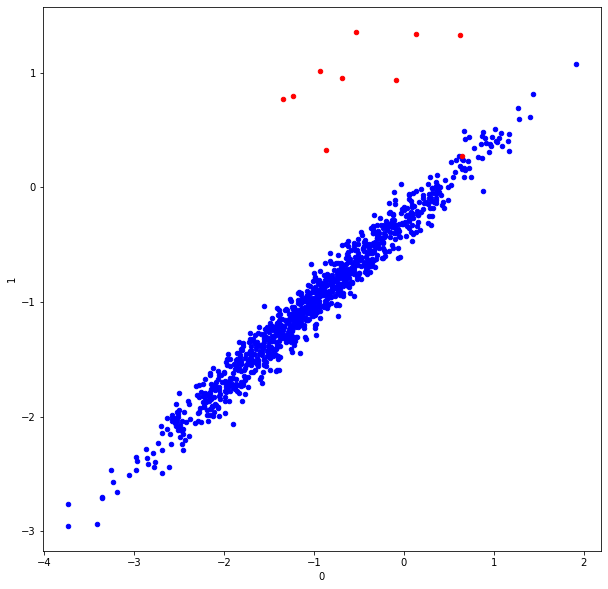

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df_X = pd.DataFrame(data=X, columns=['X1', 'X2'])
df_y = pd.DataFrame(data=y, columns=['target'])
df = pd.concat([df_X, df_y], axis=1, ignore_index=True)

fig, ax = plt.subplots(figsize=(10,10)) 

ax=df[df[2]==0].plot.scatter(x=0, y=1,  ax=ax, c='blue')
ax=df[df[2]==1].plot.scatter(x=0, y=1,  ax=ax, c='red')


In [13]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

logisticRegression = LogisticRegression(max_iter=5000)
arr_score = cross_val_score(logisticRegression, X, y, cv=StratifiedKFold(n_splits=5))
print("Cross-validation scores/Kfold= {}".format(arr_score))
print("Average cross-validation score= {}".format(arr_score.mean()))

Cross-validation scores/Kfold= [0.995 0.995 0.995 1.    1.   ]
Average cross-validation score= 0.9969999999999999


## <font color='blus'> Leave one out cross-validation strategy with imbalanced dataset

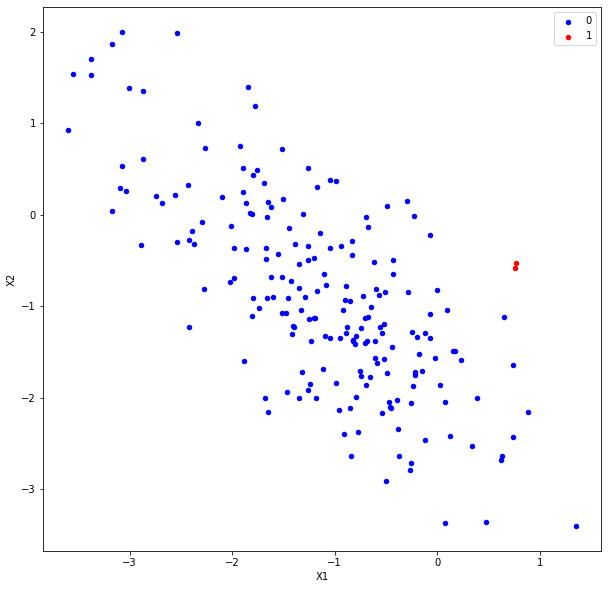

In [14]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import make_classification
import numpy as np
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

df = pd.DataFrame(dict(X1=X[:,0], X2=X[:,1], target=y))
dfgroupby = df.groupby('target')
fig, ax = plt.subplots(figsize=(10,10)) 
list_color = ['blue', 'red']
dict_color = {group_id:list_color[group_id] for group_id in np.unique(y)}
for group_id, df_group in dfgroupby :
    ax = df_group.plot.scatter(x='X1', y='X2', label=group_id, color=dict_color[group_id], ax=ax)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

logisticRegression = LogisticRegression(max_iter=1000)
arr_score = cross_val_score(logisticRegression, X, y, cv=LeaveOneOut())
print("Average cross-validation score= {}".format(arr_score.mean()))

Average cross-validation score= 0.99


# <font color='blus'>Grid search: search for bests parameters

> The best parameters for a trained model are those which best generalize this model.
>
> Hyper-parameters are those parameters that change how an algorithm behaves. These are these parameters that are searched.

## <font color='blus'>The case of linear SVC with kernel

> They are cases where linear models are not able to classify properly points for which the decision boundary 
> is not an hyperplan.
> 
> `skelearn.datasets` provide a way to build such data models.

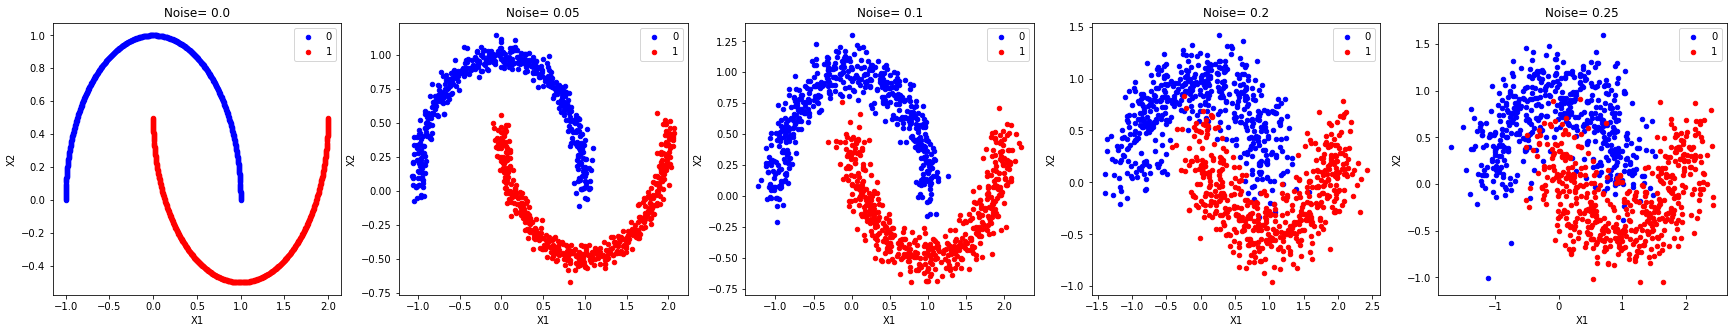

In [16]:
from sklearn.datasets import make_moons
from pandas import DataFrame
import pandas as pd
row=0
col=0
list_noise = [0., 0.05, 0.1, 0.2, 0.25]
fig, arr_ax = plt.subplots(1, len(list_noise), figsize=(30,5)) 

for noise in list_noise:
    axis = arr_ax[col]
    X, y = make_moons(n_samples=1000, noise=noise)
    df = pd.DataFrame(dict(X1=X[:,0], X2=X[:,1], target=y))
    dfgroupby = df.groupby('target')
    list_color = ['blue', 'red']
    dict_color = {group_id:list_color[group_id] for group_id in np.unique(y)}
    for group_id, df_group in dfgroupby :
        axis = df_group.plot.scatter(x='X1', y='X2', label=group_id
                                     , color=dict_color[group_id]
                                     , ax=axis
                                     , title= "Noise= {}".format(str(noise)))
        
    col+= 1


In [17]:
y.max(), y.min()

(1, 0)

> The noise parameter makes a set of points belonging to a class noisy with points from the other class.

> A low value for C, with nearly no regularization, leads to a model close to LinearRegression.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_moons

noise = 0.2
X, y = make_moons(n_samples=1000, noise=noise)

logisticRegression = LogisticRegression(max_iter=1000, C=1.)
arr_score = cross_val_score(logisticRegression, X, y, cv=StratifiedKFold())
print("Average cross-validation score= {}".format(round(arr_score.mean(),3)))

Average cross-validation score= 0.856


> A trick to solve this issue is to expand the dataset in an higher dimensional space, mean to add new feature, derived from the original one in a non linear way.
>
> The **kernel trick** consists in defining a function named **kernel function** that is able to map the original space into a bigger **expanded** space. In this expanded space, then the decision boundary becomes an hyperplan.
>
> The **trick** stands in the fact that distance between 2 points in the expanded space is computed into the original space, mean, without the need to map all points from original space into expanded space.

> Here under, a new data model is built adding a new dimension based on a non linear fonction, `rbf_function`

In [19]:
def rbf_function(x):
    l=1.
    degree=3.
    return np.exp(-(0.5*x**degree)/l**2)
X_new = np.hstack([X, rbf_function(X[:,0].reshape((-1,1)))])
X_new.shape

(1000, 3)

In [20]:
df = pd.DataFrame(dict(X0=X_new[:,0], X1=X_new[:,1], X2=X_new[:,2], target=y))
display(df[df['target']==0].describe())
print()
display(df[df['target']==1].describe())

,X0,X1,X2,target
count,500.000000,500.000000,500.000000,500.0
mean,-0.003196,0.620641,1.081135,0.0
std,0.749577,0.379302,0.471053,0.0
min,-1.402155,-0.319930,0.301773,0.0
25%,-0.693479,0.322702,0.870770,0.0
50%,0.018120,0.653406,0.999997,0.0
75%,0.651667,0.914592,1.181503,0.0
max,1.338151,1.450870,3.968326,0.0


,X0,X1,X2,target
count,500.000000,500.000000,500.000000,500.0
mean,0.983744,-0.131821,0.559196,1.0
std,0.726384,0.362767,0.402672,0.0
min,-0.438910,-0.949397,0.001659,1.0
25%,0.311633,-0.419352,0.096458,1.0
50%,0.972734,-0.147811,0.631150,1.0
75%,1.672366,0.104262,0.984981,1.0
max,2.339421,0.823184,1.043183,1.0


/var/folders/3c/hjtyk_rn3jg_lml1bd3q8fbc0000gn/T/ipykernel_1213/3005233100.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


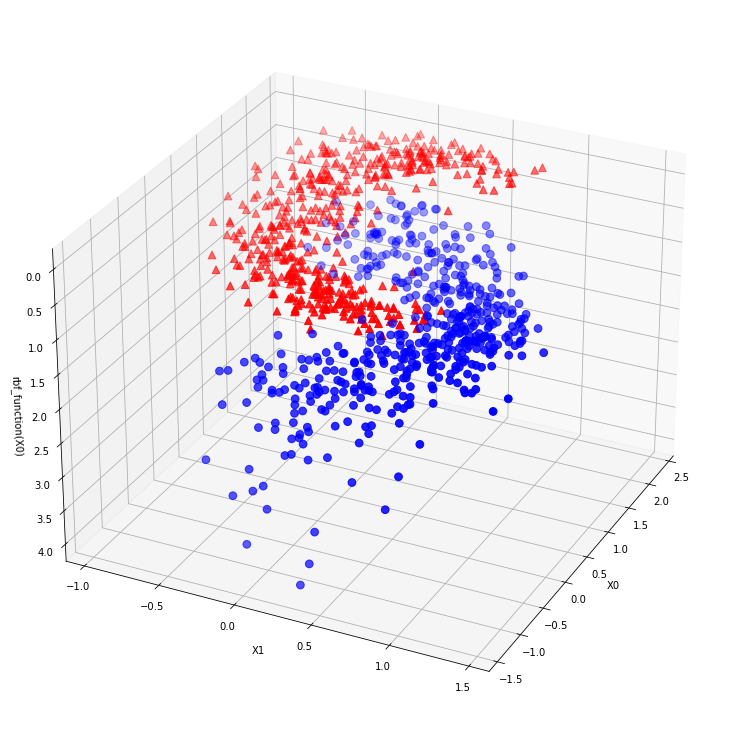

In [21]:
from mpl_toolkits.mplot3d import Axes3D

figure = plt.figure(figsize=(10,10))
ax = Axes3D(figure, elev=-152, azim=-26)

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60)
ax.set_xlabel("X0")
ax.set_ylabel("X1")
_= ax.set_zlabel("rbf_function(X0)")

In [22]:
logisticRegression = LogisticRegression(max_iter=1000, C=1.)
arr_score = cross_val_score(logisticRegression, X_new, y, cv=StratifiedKFold())
print("Average cross-validation score= {}".format(round(arr_score.mean(),3)))

Average cross-validation score= 0.864


> Kernel SVM is implemented into `sklearn.svm` package

In [23]:
from sklearn.svm import SVC
kernelSvc = SVC(kernel='rbf', C=1.e-4, gamma=2.).fit(X, y)
arr_score = cross_val_score(kernelSvc, X_new, y, cv=StratifiedKFold())
print("Average cross-validation score= {}".format(round(arr_score.mean(),3)))

Average cross-validation score= 0.909


## <font color='blus'>The grid search

> Considering `kernel SVC`, 2 parameters may be tuned in order to get the best performance for the model.
>
> This mean, for example, for any value of C in a range from 0.1 to 1., a range of values from 1. to 10. for gamma may be selected to search for the best combination of hyper-parameters.
>
> For each iteration on K-folds, model is trained on all kfolds except one, the one that is used for validation.
> 
> The best score that is issued from this search process lead to select the best pair of parameters.

> scikitlearn provides a class, `GridSearchCV` that makes the job.

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

dict_param={'C': [0.001, 0.01, 0.1, 1, 10, 100]
            , 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
gridSearchCV = GridSearchCV(SVC(), dict_param, cv=5)
gridSearchCV.fit(X, y)
print("Best cross-validation score: {:.2f}".format(gridSearchCV.best_score_))
print("Best parameters: {}".format(gridSearchCV.best_params_))


Best cross-validation score: 0.97
Best parameters: {'C': 1, 'gamma': 1}


>
> **But** : these parameters have been selected based on each validation Kfold. 
>
> This selection is then dependant from Kfolds where validation process took place. This is not a guarantee a good generalization.
>
> Generalization assessment has to take place on unseen data and then, the score for unseen data will provide an evaluation of ability for the model to generalize.
>
> For doing so, a test dataset has to be built, separated from kfolds and generalization assessment has to take place using these unseen data from test dataset.
>
> For building this schema, `train_test_split` function is used. Resulting `X_train` and `y_train` are used for grid-search-corss-validation while `X_test` and `y_test` are used for evaluation of ability of algorithm to generalize.

> Applying this gridsearch strategy over a noisy dataset

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_moons

noise = 0.25
X, y = make_moons(n_samples=1000, noise=noise)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=13)

dict_param={'C': [0.001, 0.01, 0.1, 1, 10, 100]
            , 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
gridSearchCV = GridSearchCV(SVC(), dict_param, cv=StratifiedKFold())
gridSearchCV.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(gridSearchCV.best_score_))
print("Best parameters: {}".format(gridSearchCV.best_params_))
print("Test set score: {:.2f}".format(gridSearchCV.score(X_test, y_test)))

Best cross-validation score: 0.94
Best parameters: {'C': 10, 'gamma': 1}
Test set score: 0.96


# <font color='blus'>Evaluation metrics and Scoring from supervized models

## <font color='blus'>Business impact of a model

> The knowledge graph below illustrates how a metric used to score a model impacts a business target issued from business strategy.
>
> 
>
> - `Business strategy` defines or targets an expected `Business impact` from an algorithm that is released on production. 
> - While released in production `Production Algorithm` impacts on business.
> - Before being released in production, `Assessed Algorithm` has been quantitatively assessed with a `Score`.
> - This `Score` is measured by a `Metric`
> - Depending the type of `Supervized Algorithm`, such as `Regression` or `Classification` algorithm, used metric may be `R^2` or `Accuracy`
>
> **The selection of a such `Metric` depends on `Business Metric` defined to assess the `Business Impact` that `Business Stragey` has targeted**

> From this graph : 
> - The gold area is what is related with business issues
> - The blue part is what is already known from previous courses.
> - **The red area is what will be visited in next sections.**

> 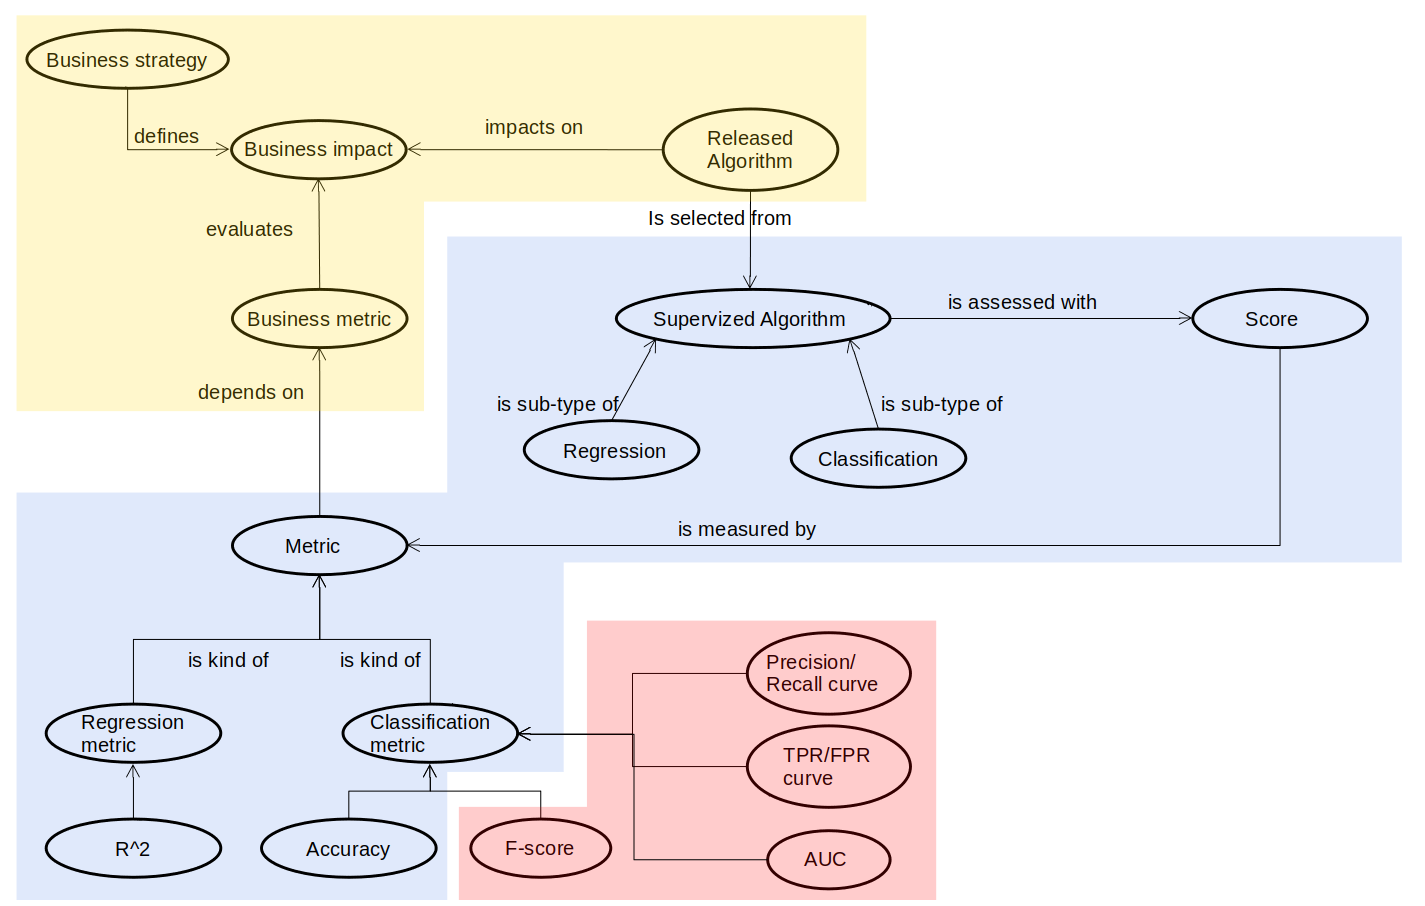

## <font color='blus'>Metrics for binary classification

> In binary classification task, a prediction is the statement of wether or not a person has a cancer. This statement may be True or False.
>
> In a such binary classification case, classified persons with class=1 are those predicted with a cancer, the one classified with class=0 are those predicted as healthy persons.
>
> By convention, **Class=1** is assigned to the **class of interest**, the one that is searched for.
>
> In case of binary classification, a model makes 2 kinds of errors:
>> - **False Positive** when an healthy person is predicted having a cancer.
>> - **False Negative** when a person with a cancer is predicted as healhty.
>

> 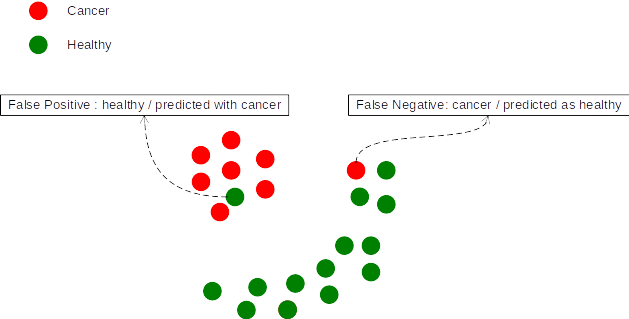

> In term of **business impact**, these kinds of errors do not have the same influence. When an healthy person is predicted having a cancer, then additionals investigations should take place and impact may be additional costs due to further clinicals investigations.
>
> But when a person with a cancer is predicted being healthy, then consequences is a matter of life of death. 
>
>
> 
> Then, what kind of metric should be selected to be aligned with the business strategy.

>
> Another example is that task that predicts if a customer is creditworthy (class 1) or not (class 0). It is supposed here that creditworth clients are less frequent then others, that may be not true.
>
> A such  binary classification leads to the 2 kinds of errors :
>> - **False Positive** clients that are predicted creditworthy but that are not
>> - **False Negative** clients that are creditworthy but predicted as not.
> In term of business impact, is becomes difficult to evaluate which one of these two errors have the worst consequences on the banking business.
>
> **What is the business impact?**
>
> A client that has been predicted as False positive will benefit of this prediction error while the risk that bank pay this risk later raises dramaticaly.
>
> In the inverse situation where a creditworthy client is predicted as not, this error will not benefit to any of the protagonists. The risk of loosing a client will then become hight and it is likely the client will not appreciate the bank services and leave bank for a competitor. Also ethic and reputation are also factors that may be taken into account for the evaluation of the business impact.
>
> In any case, it is possible to assign a business cost, such as reputation costs or financial costs, for these kinds of such errors, False Positive and False Negative. This business issue is the matter of business experts.
>

## <font color='blus'>Metrics selection in binary classification

> They are a lot of metrics in case of binary classification and the selection of a metric strongly depends on business impact that has been assigned by the business strategy.
>
> This section describes how to select such metrics.

### <font color='blus'>Confusion matrix

> Cases of imbalanced classes in binary classification are frequents. In a such situation, positive cases, the cases of interests, are fare less frequents. This render difficult to correctly predict Positives cases.  
>
> **The rarity of Positives cases value the algorithms in charge of predicting them**.
>
> Confusion matrix expose in a single matrix proportios of False Positive and False Negative classifications along with True Positive and True Negative classifications.

> Building imbalanced dataset thanks to `make_classification`

In [26]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

print("Number of positive values= {}".format(np.where(y==1)[0].shape[0]))

Number of positive values= 10


> Scoring the `LogisticRegression` algorithm with the **accuracy metric**.
>
> Reason fo doing so on imbalanced dataset is to show that accuracy in situation of imbalanced datasets, is not a relevant metric to score an algorithm.
>

In [27]:
logisticRegression = LogisticRegression(max_iter=1000, C=1.)
arr_score = cross_val_score(logisticRegression, X, y, cv=StratifiedKFold())
print("Average cross-validation score= {}".format(round(arr_score.mean(),3)))

Average cross-validation score= 0.997


> Conclusion : this algorithm, with hyperparameters (max_iter=1000, C=1) is supposed to generalized at the level of accuracy of 85%.

> Let's go in more detail with errors algorithm has made. 
>
> Let's see proportion of errors for False Positive and False Negative
>
> For doing so, we use the **confusion matrix**.

In [28]:
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5, random_state=13)
logisticRegression.fit(X_train,y_train)
y_pred = logisticRegression.predict(X_test)
arr_confmatrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(arr_confmatrix))

Confusion matrix:
[[494   0]
 [  5   1]]


> A more elegant way to show confusion matrix:

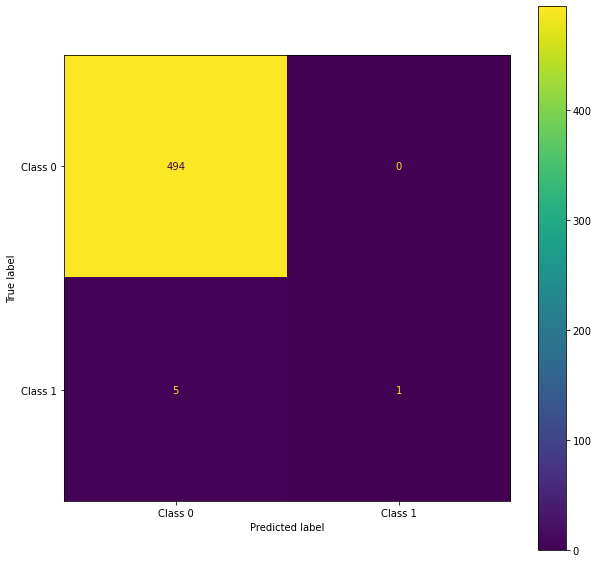

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
cmp = ConfusionMatrixDisplay(arr_confmatrix, display_labels=['Class 0', 'Class 1'])
fig, ax = plt.subplots(figsize=(10,10))
ax = cmp.plot(ax=ax)

> Calculation of accuracy using the confusion matrix:
> - $Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$

In [30]:
print("Accuracy for imbalanced dataset= {}%".format((arr_confmatrix[0,0]+arr_confmatrix[1,1])/len(X_test)))
print("Number of positive values in Test dataset= {}".format(np.where(y_test==1)[0].shape[0]))

Accuracy for imbalanced dataset= 0.99%
Number of positive values in Test dataset= 6


>
> This accuracy score, calculated on test dataset with an algorithm trained with train dataset, complies with cross-validation average score that assesses the ability for this algorithm, with default parameters, to generalize.
>

It is legitimate to ask for follwoings questions :
>
> Quizz :
> - Total of elements into Class 0?
> - Total of elements into Class 1?
> -  Number of True Positive?
> -  Number of True Negative?
> -  Number of False Positive?
> -  Number of False Negative?


> While accuracy is 99%, confusion matrix reveals another reality :
>
> Quizz: 
> - How many Positives classes have been missed? 
> - How many Negatives classes have been missed? 

> Quizz :
> - Why the algorithm is not able to predict more elements from Positive class?

> From confusion matrix elements, mean, True Positive, True Negative, False Positive and False Negative, many error measurement are derived from.

### <font color='blus'>Precision, recall

> Precision and recall are focused on Positive class.
>
> Precision is the measure of Positive elements classified as Positive. The More precision is closed to 1, the less are the False Positive classifications.
>
> This measure calculates the **accuracy for the Positive** class. When precision is high, the algorithm will classify very few Positive cases as Negative. This is a measure of noise in Positive classifications.
>
> - $Precision= \frac{TP}{TP+FP} = \frac{494}{494+0}= 1.$
>
> Recal may be regarded as the cases to be recall because algorithm fails. If a person has a cancer and is predicted to be healthy, then he is predicted as False Negative case. He will be recalled. The more recall is closed to 0, the less are the False Negative classifications.
>
> Recall calculates the quantity of Positive predictions that failed.
> - $Recall = \frac{TP}{TP+FN} = \frac{494}{494+5}=0.99$

### <font color='blus'>F1 score

> 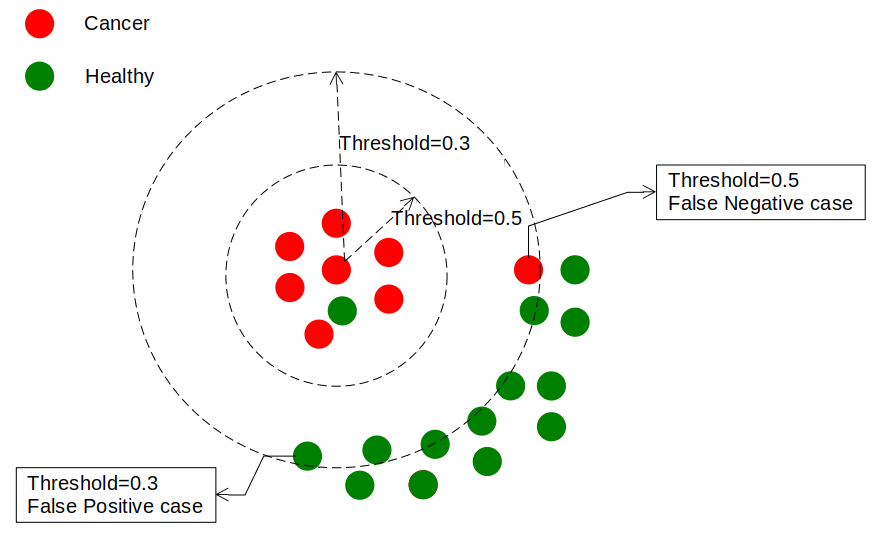

> When False Negative cases decrease, Recall tends toward 1. But decreasing False Negative is paid with an increase of False Positive cases and Precision tends toward 0.
>
> `F1` measure allows the optimization of both Recall and Precision measures. It is the **harmonic mean** between Precision and Recall.

#### <font color='blus'>Harmonic mean

> 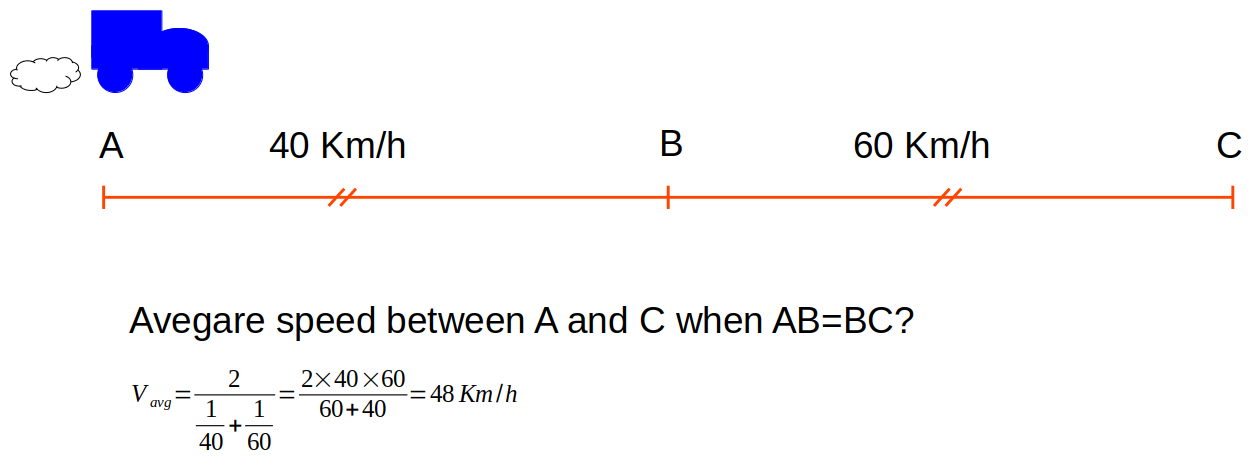

#### <font color='blus'>Harmonic mean for Precision and Recall

> This measurement allow to have both, in "harmony" Recall and Precision measurements.
>
> F1 score is the harmonic average of Precision and Recall.
>
> It's formula is :
> - $F_1 = \frac{2}{\frac{1}{Recall}+\frac{1}{Precision}}= 2\times \frac{Precision \times Recall}{Precision+Recall}= \frac{TP}{TP+\frac{FP+FN}{2}} = 2\times \frac{1.\times0.99}{1.+0.99}=0.994$

> `classification_report` is a tool that details, precision, recall and f1-score given each class.

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))

              precision    recall  f1-score   support

     Class 0       0.99      1.00      0.99       494
     Class 1       1.00      0.17      0.29         6

    accuracy                           0.99       500
   macro avg       0.99      0.58      0.64       500
weighted avg       0.99      0.99      0.99       500



> - Support: this is the number of cases on which indexes, Class 0, ... weighted avg has been calculated.
> - F1-score is also calculated per class. Eg:
>> - Class 0: FP=5; TP=494; FN=0 $\implies F_1(Class0) = \frac{494}{494+\frac{5+0}{2}} = 0.99$
>> - Class 1: FP=0; TP=1; FN=5   $\implies F_1(Class1) = \frac{1}{1+\frac{5+0}{2}} = 0.29$
> - F1-score macro avg : geometric mean of F1 scores : $\frac{0.99+0.29}{2} = 0.64$
> - F1-score weighted avg : weighted mean of F1 scores : $0.99*\frac{494}{500}+0.29*\frac{6}{500} = 0.99$

In [32]:
print("Class 1 : Recall  = {}".format(round(1/(5+1), 2)))
print("Class 1 : F1-score= {}".format(round(2*0.17/(1.17),2)))

Class 1 : Recall  = 0.17
Class 1 : F1-score= 0.29


> While multiple algorithms are evaluatued, then F1-score may allow to select the algorithm with the best F1-score.
>
> This, when it is supposed that FP and FN both have an equal impact on business.
>
> In a different situation Cosr matrix may help for algorithm selection.

### <font color='blus'>Cost matrix

> When it is supposed that business impact is purely financial, a cost may be assigned to both, False Positive cases and False Negatives cases.
>
> True Positive cases and True Negative cases are regarded as neutrals in the sense they will not impact negatively.
>
> - Cost of FP : 1 000 USD
>
> - Cost of FN : 10 000 USD (ten times False Positive cases)

In [33]:
fp_cost = 1000
fn_cost = 10*fp_cost
print("Total cost= {}USD".format(arr_confmatrix[1][0]*fn_cost + arr_confmatrix[0][1]*fp_cost))

Total cost= 50000USD


> This mean that for a bunch of 1000 cases, the cost of a such algorithm is esimated to 50KUSD

## <font color='blus'>Application : confusion matrix over Moon dataset classification

> Considering financial business metric, two differents algorithms will be compared and the one that 
>
> optimise financial impact will be a candidate for release in production.

### <font color='blus'>The moon dataset

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

noise = 0.25
X, y = make_moons(n_samples=1000, noise=noise)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=13)

### <font color='blus'>Logistic Regression

> Bests parameters for logistic regression are searched through a cross validation grid search

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


dict_param={'solver': ['newton-cg', 'lbfgs', 'sag']
            , 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
gridSearchCV = GridSearchCV(LogisticRegression(), dict_param, cv=StratifiedKFold())
gridSearchCV.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(gridSearchCV.best_score_))
print("Best parameters: {}".format(gridSearchCV.best_params_))
print("Test set score: {:.2f}".format(gridSearchCV.score(X_test, y_test)))

Best cross-validation score: 0.87
Best parameters: {'C': 10, 'solver': 'newton-cg'}
Test set score: 0.87


> Bests parameters are selected from grid search.
>
> Model is trained then scored with confusion matrix

Confusion matrix:
[[123  18]
 [ 20 139]]


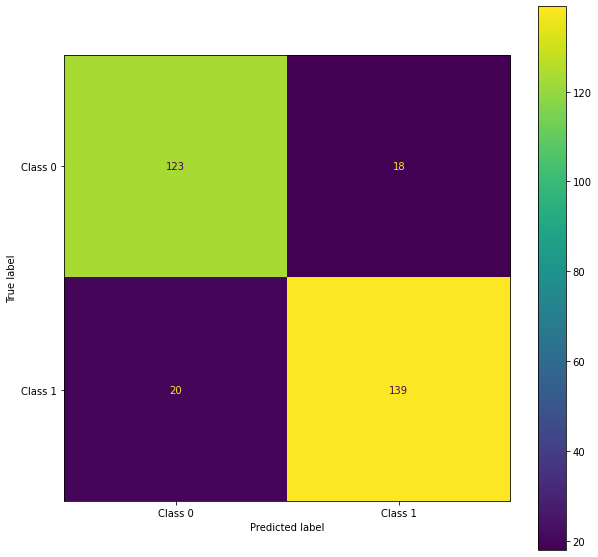

In [36]:
from sklearn.metrics import confusion_matrix

dict_best_param = gridSearchCV.best_params_
logisticRegression = LogisticRegression(**dict_best_param)


logisticRegression.fit(X_train,y_train)
y_pred = logisticRegression.predict(X_test)
arr_confmatrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(arr_confmatrix))

from sklearn.metrics import ConfusionMatrixDisplay
cmp = ConfusionMatrixDisplay(arr_confmatrix, display_labels=['Class 0', 'Class 1'])
fig, ax = plt.subplots(figsize=(10,10))
ax = cmp.plot(ax=ax)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))

              precision    recall  f1-score   support

     Class 0       0.86      0.87      0.87       141
     Class 1       0.89      0.87      0.88       159

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



In [38]:
fp_cost = 1000
fn_cost = 10*fp_cost
total_cost = round((arr_confmatrix[1][0]*fn_cost + arr_confmatrix[0][1]*fp_cost)/len(X_test),1)
print("Logistic regression: total cost/false case= {}0 USD".format(total_cost))


Logistic regression: total cost/false case= 726.70 USD


### <font color='blus'>Support Vector Machine for classification

> Scoring algorithm with grid search on cross-validation strategy

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_moons
kernel='sigmoid'
noise = 0.25
X, y = make_moons(n_samples=1000, noise=noise)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=13)

dict_param={'C': [0.001, 0.01, 0.1, 1, 10, 100]
            , 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
            , 'kernel':[kernel]}
gridSearchCV = GridSearchCV(SVC(probability=True, degree=2), dict_param, cv=StratifiedKFold())
gridSearchCV.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(gridSearchCV.best_score_))
print("Best parameters: {}".format(gridSearchCV.best_params_))
print("Test dataset accuracy score: {:.2f}".format(gridSearchCV.score(X_test, y_test)))

Best cross-validation score: 0.87
Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}
Test dataset accuracy score: 0.86


In [40]:
dict_best_param = gridSearchCV.best_params_
svc = SVC(**dict_best_param, probability=True)

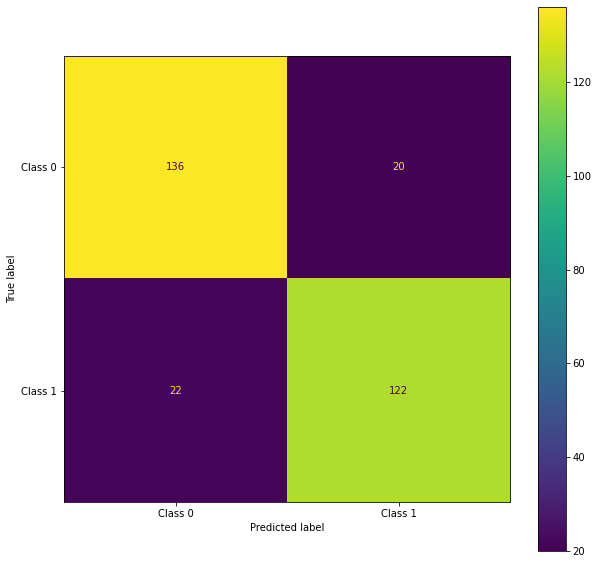

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
arr_confmatrix = confusion_matrix(y_test, y_pred)

cmp = ConfusionMatrixDisplay(arr_confmatrix, display_labels=['Class 0', 'Class 1'])
fig, ax = plt.subplots(figsize=(10,10))
ax = cmp.plot(ax=ax)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))

              precision    recall  f1-score   support

     Class 0       0.86      0.87      0.87       156
     Class 1       0.86      0.85      0.85       144

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



In [43]:
fp_cost = 1000
fn_cost = 10*fp_cost
total_cost = round((arr_confmatrix[1][0]*fn_cost + arr_confmatrix[0][1]*fp_cost)/len(X_test),1)
print("Linear SVC : total cost/false case= {}0 USD".format(total_cost))

Linear SVC : total cost/false case= 800.00 USD


> **What's wrong with this process?**

> In fact, same test dataset has been used to compare SVC and LinearRegression.
>
> Costs evaluation of the best algorithm has to take place over a dataset that hasn't been ever used. Test dataset has already been used after cross-validation process to select the best parameters.
>
> An additional dataset, for costs has to be build.

### <font color='blus'>Precision - Recall curve

> 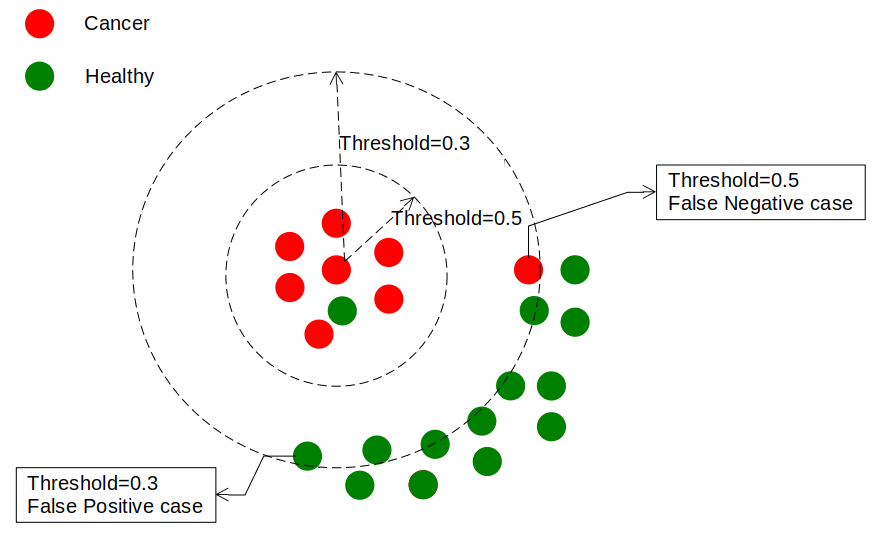

> - Increasing threshold lead to increase False Negative rate while False Positive rate decreases.
> - Decreasing threshold leads to increase False Positive rate while False Negative rate decreases.
>
> Mooving the threshold leads to different values from F1-score.
>
> **What is the optimized threshold leading to the best F1-score?**

> A level of certainity is assigned for each classification. The method `predict_proba` that is present in classfiers, provides this additional level of granularity. Each case is assigned a probability for class 0 and class 1 with their sum equal to 1.
>
> On the example below, a pandas dataframe is built from the output of `svc.predict_proba`, `svc` is a Support Vector Machine instance for classifiers.
>
> Some cases are displayed around the threshold, 0.5

> Below, `predict_proba` output display probabilities around threshold 0.5 

In [44]:
import pandas as pd
import numpy as np

df_prob = pd.DataFrame(svc.predict_proba(X_test)).rename(columns={0:'Class 0',1:'Class 1'})

filter1 = df_prob['Class 1'] > 0.45
filter2 = df_prob['Class 1'] < 0.55
filterx = filter1 & filter2 
df_prob[ filterx ]

,Class 0,Class 1
62,0.489076,0.510924
67,0.471256,0.528744
72,0.500000,0.500000
162,0.469292,0.530708
180,0.527770,0.472230
189,0.506569,0.493431
197,0.461453,0.538547
265,0.538533,0.461467
294,0.500000,0.500000


> **Precision / Recall curve is used when positive class is more important then negative class.**

Best Threshold=0.44, F-1 score=0.863 


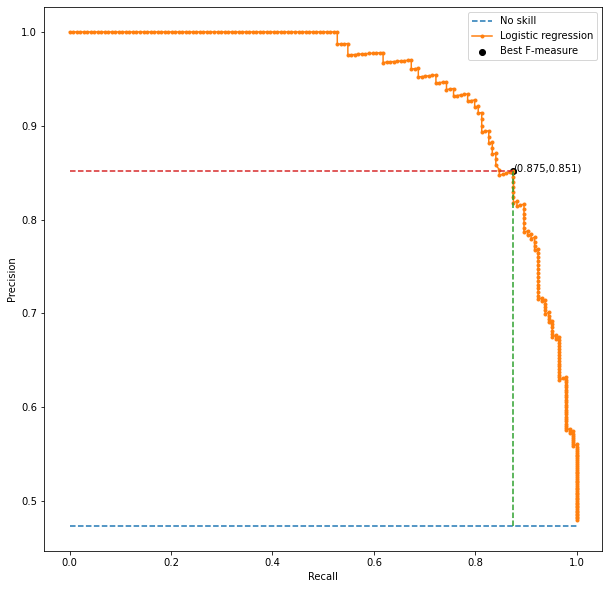

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import numpy as np

precision, recall, prob_thresholds = precision_recall_curve(y_test, svc.predict_proba(X_test)[:,1])

# Convert to f1 measure
f1score = (2 * precision * recall) / (precision + recall)

# Locate the index of the largest value in f1-score array
ix = np.argmax(f1score)
print( 'Best Threshold={}, F-1 score={} '.format(round(prob_thresholds[ix],3), round(f1score[ix],3)))
rec  = recall[ix]
pre  = precision[ix]

# Plot the noskill position
no_skill = len(y_pred[y_pred==1]) / len(y_pred)

# Plot the (Recall, Precision) curve
fig, ax = plt.subplots(figsize=(10,10))

plt.plot([0,1], [no_skill,no_skill], linestyle= '--' , label= 'No skill' )
plt.plot(recall, precision, marker= '.' , label= 'Logistic regression'  )

#Plot the best point considering F1 score
plt.scatter(recall[ix], precision[ix], marker= 'o' , color= 'black' , label= 'Best F-measure' )

plt.plot([rec,rec], [no_skill,pre], linestyle= '--' , label= '' )
plt.plot([0,rec], [pre,pre], linestyle= '--' , label= '' )
plt.text(rec, pre, s='('+str(round(rec,3))+','+str(round(pre,3))+')' )
# axis labels
plt.xlabel( 'Recall' )
plt.ylabel( 'Precision' )
plt.legend()
# show the plot
plt.show()

> No skill curve (dashed blue) is the proportion of positive cases in the dataset

In [46]:
no_skill = len(y_pred[y_pred==1]) / len(y_pred)
print("Proportion of Class 1 into Dataset= {}".format(round(no_skill,2)))

Proportion of Class 1 into Dataset= 0.47


> **Average precision score**

In [47]:
from sklearn.metrics import average_precision_score, auc

aps = average_precision_score(y_test, svc.predict_proba(X_test)[:,1])
print("Average Precision score= {}".format(round(aps,2)))

Average Precision score= 0.94


### <font color='blus'>Moving threshold

> Threshold is arbitrary changed with a precision fixed to another value then the optimozed value.
>
> This can be done in order to  predict more Positive cases.

(177,)
(142,)


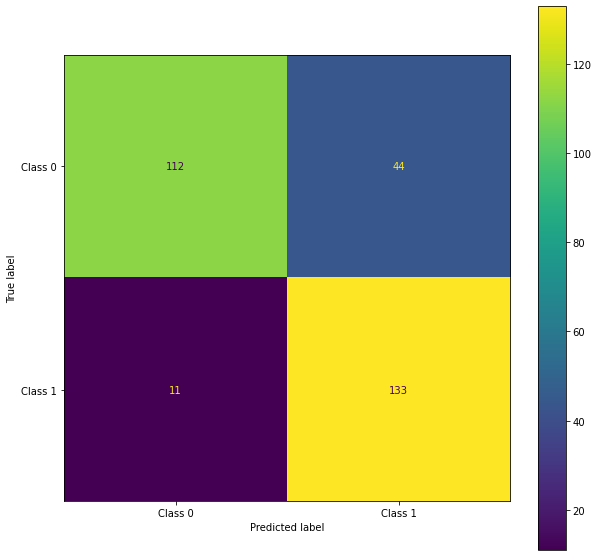

In [48]:
PRECISION = 0.75
filter1= precision>=PRECISION

idx = np.where(filter1)[0][0]
prob_threshold = prob_thresholds[idx]
filter_pos = svc.predict_proba(X_test)[:,1]>=prob_threshold
arr_idx_pos = np.where(filter_pos)[0]
print(y_pred[arr_idx_pos].shape)
print(np.where(y_pred==1)[0].shape)

y_pred_sample = np.zeros(len(y_pred))
for idx in arr_idx_pos :
    y_pred_sample[idx] = 1
    
#y_pred_sample = (svc.predict_proba(X_test)[:,1] >= PRECISION).astype( 'int' )
y_pred_sample
arr_confmatrix = confusion_matrix(y_test, y_pred_sample)

cmp = ConfusionMatrixDisplay(arr_confmatrix, display_labels=['Class 0', 'Class 1'])
fig, ax = plt.subplots(figsize=(10,10))
ax = cmp.plot(ax=ax)

> As shown, False Negative decreased bu False Positive increased.
>
> Impact on the costs: 

In [49]:
fp_cost = 1000
fn_cost = 10*fp_cost
total_cost = round((arr_confmatrix[1][0]*fn_cost + arr_confmatrix[0][1]*fp_cost)/len(X_test),1)
print("Linear SVC Threshold={}: total cost/false case= {}0 USD".format(round(prob_threshold,3),total_cost))

Linear SVC Threshold=0.245: total cost/false case= 513.30 USD


### <font color='blus'>ROC curve

> ROC curve is a way to assess performance of a **binary classification** algorithm. 
>
> This measurement is used when Positive class and Negative class are equally important.
>
> This curve draws pairs $(FPR, TPR)$ for each decision threshold.
> 
>This curve is used when positive and negative classes have same importance.
> Reminder : 
>> - $FPR = \frac{FP}{FP+TN}$ on horizontal axis with 
>
>> - $TPR = \frac{TP}{TP+FN}$ on vertical axis

Best Threshold=0.637, G-mean score=0.869 
(FPR, TPR)=(0.071,0.812)


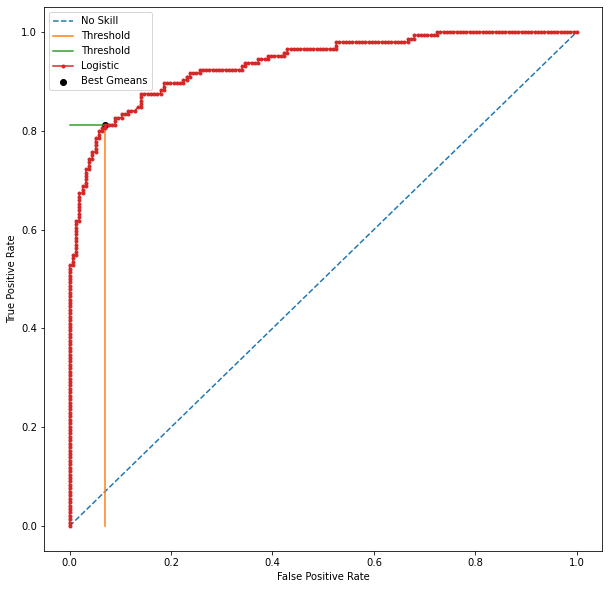

In [50]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np

fpr, tpr, prob_thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:,1], drop_intermediate=False)
arr_gmean = np.sqrt(tpr * (1-fpr))


# locate the index of the largest g-mean
ix = np.argmax(arr_gmean)

print( 'Best Threshold={}, G-mean score={} '.format(round(prob_thresholds[ix],3), round(arr_gmean[ix],3)))
fig, ax = plt.subplots(figsize=(10,10))

plt.plot([0,1], [0,1], linestyle= '--' , label= 'No Skill' )
plt.plot([fpr[ix],fpr[ix]], [0,tpr[ix]], linestyle= '-' , label= 'Threshold' )
plt.plot([0,fpr[ix]], [tpr[ix],tpr[ix]], linestyle= '-' , label= 'Threshold' )

# plot the roc curve for the model
plt.plot(fpr, tpr, marker= '.' , label= 'Logistic' )
plt.scatter(fpr[ix], tpr[ix], marker= 'o' , color= 'black' , label= 'Best Gmeans' )
# axis labels
plt.xlabel( 'False Positive Rate' )
plt.ylabel( 'True Positive Rate' )
plt.legend()
# show the plot
print("(FPR, TPR)=({},{})".format(round(fpr[ix],3),round(tpr[ix],3)))
plt.show()

> Horizontal axis, FPR, is the fraction of Negative cases that failed to be properly classified.
> 
> Vertical axis, TPR, is the fraction of Positive cases that have been properly classified.

> ROC curve does not allow to have a quick look when comparing 2 classifiers.
>
> A way to obtain a global overview of $(FPR, TPR)$ is the calculation of area under the ROC curve.

In [51]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, svc.predict_proba(X_test)[:,1])
print("Area under ROC curve= {}".format(round(auc,2)))

Area under ROC curve= 0.94


## <font color='blus'>Confidence in predictions

> How the algorithm is confident in its prediction?
>
> It depends the threshold fixed for decision.

> For binary classification task, an observation is classified into class 0 or class 1 depending a threshold.
>
> By default, this last is 0.5; above this value, observation is classified in class 1. Above this value, an observation is classified in class 0.

> Some obervations may have a large uncertainity, such as the one : $pred_1 \in ]0.45, 0.55[$

### <font color='blus'>Displaying decision boundary

> **The following is required to install latest version of `DecisionBoundaryDisplay`**

In [52]:
#!pip install --pre --extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn

In [53]:
#pip install -U scikit-learn

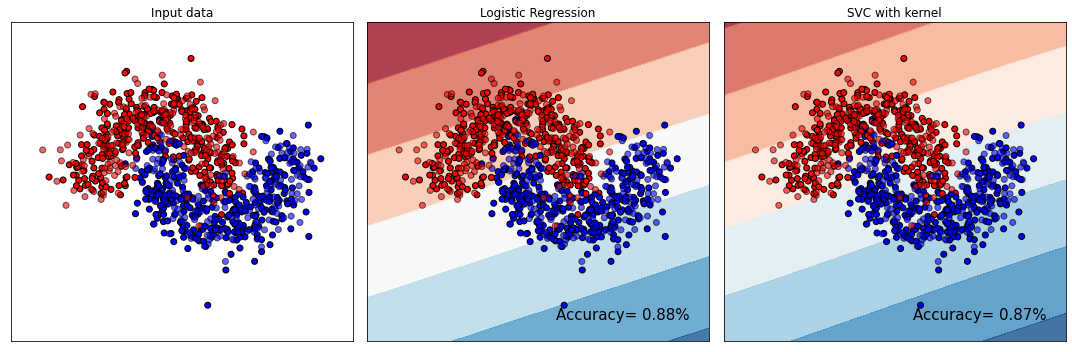

In [54]:
import matplotlib.pyplot as plt
# -*- coding: utf-8 -*-
"""
=====================
Classifier comparison
=====================

A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.

"""

# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
names = [
    "Logistic Regression"
    ,"SVC with kernel"
]

classifiers = [
    logisticRegression
    , svc
]

datasets = [(X,y)]

figure = plt.figure(figsize=(15, 5))
icol = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    #X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, icol)
    if ds_cnt == 0:
        ax.set_title("Input data")
    
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    icol += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, icol)
        # Train algorithm
        clf.fit(X_train, y_train)
        
        # Score algorithm
        score = clf.score(X_test, y_test)
        
        # Draw decision boundary from classifier and plot it inside ax frame
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )
        
        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        
        # Plot the testing points
        ax.scatter(
            X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="k", alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            "Accuracy= {}%".format(round(score,2)),
            size=15,
            horizontalalignment="right",
        )
        icol += 1

plt.tight_layout()
plt.show()

     The classification of this data model, mean, the problem to solve, is not linear in the sens classes can't be splitted with straight lines. Nevertheless, it this problem can be  solved if appropriate transformations take place on features.
>
> Decision boundaries are displayed as straight bands for Linear Regression. This reflects the linear aspect of the model, the decision boundary is a linear combination of features.
> 
> For SVC, that is a linear algorihtm, features have been non linearly transformed in order the classification to be solved as a linear problem. The kernel trick has been used, consisting in solving this non-linear problem as a linear probleam in a largest space, such, thanks to a kernel function (Mercer theorem).  
>
>On the image above, blues points in red area are False Positive while red points into blue area are False Negatives.
>
> Decreasing threshold to capture more positive classes leads to more False positive then precision decreases and also F1-score decreases. 
>
> Decreasing threshold leads to a situation where the algorithm is less confident in its classification.

> The function `precision_recall_curve` allows to draw the points (precision, recall) for each threshold value.
>
> Decision function provides a set of decisions values where threshold is 0.

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_moons

noise = 0.25
X, y = make_moons(n_samples=1000, noise=noise)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=13)

dict_param={'C': [0.001, 0.01, 0.1, 1, 10, 100]
            , 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
            , 'kernel':['rbf']}
gridSearchCV = GridSearchCV(SVC(probability=True), dict_param, cv=StratifiedKFold())
gridSearchCV.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(gridSearchCV.best_score_))
print("Best parameters: {}".format(gridSearchCV.best_params_))
print("Test dataset accuracy score: {:.2f}".format(gridSearchCV.score(X_test, y_test)))

Best cross-validation score: 0.94
Best parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Test dataset accuracy score: 0.95


In [56]:
dict_best_param = gridSearchCV.best_params_
svc = SVC(**dict_best_param, probability=True)

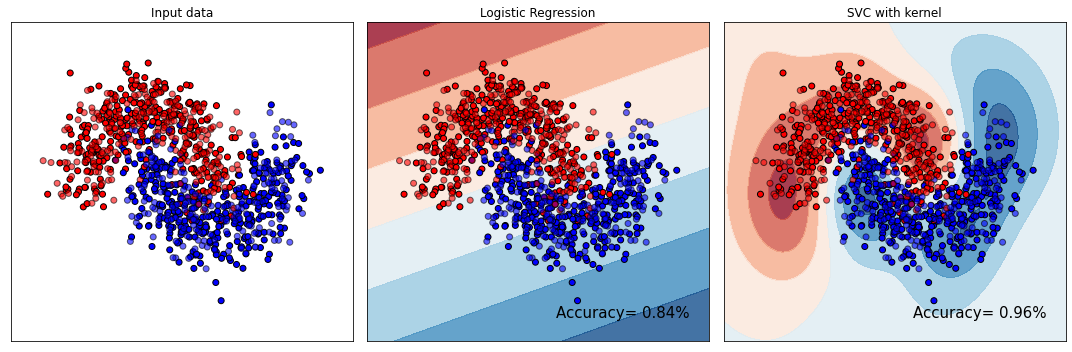

In [57]:
import matplotlib.pyplot as plt
# -*- coding: utf-8 -*-
"""
=====================
Classifier comparison
=====================

A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.

"""

# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
names = [
    "Logistic Regression"
    ,"SVC with kernel"
]

classifiers = [
    logisticRegression
    , svc
]

datasets = [(X,y)]

figure = plt.figure(figsize=(15, 5))
icol = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    #X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, icol)
    if ds_cnt == 0:
        ax.set_title("Input data")
    
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    icol += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, icol)
        # Train algorithm
        clf.fit(X_train, y_train)
        
        # Score algorithm
        score = clf.score(X_test, y_test)
        
        # Draw decision boundary from classifier and plot it inside ax frame
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )
        
        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        
        # Plot the testing points
        ax.scatter(
            X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="k", alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            "Accuracy= {}%".format(round(score,2)),
            size=15,
            horizontalalignment="right",
        )
        icol += 1

plt.tight_layout()
plt.show()